**1. Mount the Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/major project'

In [ ]:
dataset_path = '/content/drive/MyDrive/major project/covid_dataset'

# **2. Install split folder python package**

https://pypi.org/project/split-folders/

In [ ]:
!pip install split_folders

**3. Splitting the data in training, testing and validation 

*   List item
*   List item

set**

In [ ]:
import splitfolders
splitfolders.ratio(dataset_path, output="split", seed=1337, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 150 files [00:31,  4.72 files/s]


# **4. Loading the dataset with normalization in batches**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Normalize training and validation data in the range of 0 to 1
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Read the training sample and set the batch size 
train_generator = train_datagen.flow_from_directory(
        '/content/split/train',
        target_size=(224, 224),
        batch_size=8,
        seed=100,
        class_mode='categorical')

# Read Validation data from directory and define target size with batch size
validation_generator = validation_datagen.flow_from_directory(
        '/content/split/val',
        target_size=(224, 224),
        batch_size=8,
        class_mode='categorical',
        seed=1000,
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        '/content/split/test',
        target_size=(224, 224),
        batch_size=8,
        seed=500,
        class_mode='categorical',
        shuffle=False)

Found 120 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [ ]:
print(len(test_generator))

2


**5. Model Building**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
#inputs = keras.Input(shape=(128, 128,3))
#x = layers.Flatten()(inputs)
#x = layers.Dense(32, activation="relu")(x)
#x = layers.Dense(64, activation='relu')(x)
#outputs = layers.Dense(3, activation="softmax")(x)
#model = keras.Model(inputs, outputs)
#model.summary()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
baseModel = VGG16(weights="imagenet", include_top=False,
input_tensor=Input(shape=(224, 224, 3)))


58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False
  # train the head of the network
print("[INFO] training head...")



[INFO] training head...


In [ ]:
print(train_generator)

**6. Model Compilation and Training**




In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
RMSprop1 = RMSprop(learning_rate=0.0001)
# We are going to use accuracy metrics and cross entropy loss as performance parameters
model.compile(RMSprop1, loss='categorical_crossentropy', metrics=['acc'])
# Train the model 
history = model.fit(train_generator, 
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=80,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/80
15/15 [==============================] - 4s 217ms/step - loss: 0.3655 - acc: 0.9000 - val_loss: 0.6562 - val_acc: 0.8000
Epoch 2/80
15/15 [==============================] - 3s 197ms/step - loss: 0.3714 - acc: 0.8750 - val_loss: 0.6542 - val_acc: 0.8000
Epoch 3/80
15/15 [==============================] - 3s 196ms/step - loss: 0.3783 - acc: 0.8917 - val_loss: 0.6433 - val_acc: 0.8000
Epoch 4/80
15/15 [==============================] - 3s 196ms/step - loss: 0.3462 - acc: 0.9167 - val_loss: 0.6550 - val_acc: 0.8000
Epoch 5/80
15/15 [==============================] - 3s 198ms/step - loss: 0.3283 - acc: 0.9083 - val_loss: 0.6556 - val_acc: 0.8000
Epoch 6/80
15/15 [==============================] - 3s 198ms/step - loss: 0.3608 - acc: 0.9000 - val_loss: 0.6424 - val_acc: 0.8000
Epoch 7/80
15/15 [==============================] - 3s 197ms/step - loss: 0.3357 - acc: 0.9000 - val_loss: 0.6463 - val_acc: 0.8000
Epoch 8/80
15/15 [==============================] - 3s 197ms/step - loss: 0.

In [ ]:
print(len(validation_generator))

2


In [ ]:
labels = train_generator.class_indices
labels


{'COVID': 0, 'Normal': 1, 'Viral Pneumonia': 2}

**7. Model saving**

In [ ]:
model.save('covid_classification.h5')

**8. Plotting accuracy and loss graph for training and validation dataset**

In [ ]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

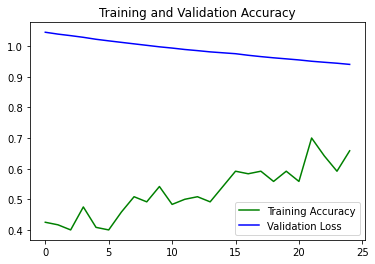

<Figure size 432x288 with 0 Axes>

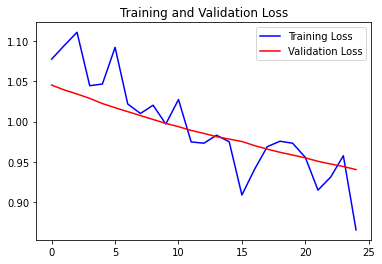

In [ ]:
import matplotlib.pyplot as plt
epochs = range(len(train_acc)) 
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
#plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


# **10. Evaluate model performance on test dataset**

In [ ]:
test_output= model.evaluate(test_generator, steps=test_generator.samples/test_generator.batch_size, verbose=1)
print(test_output)
print(model.metrics_names)

1/1 [==============================] - 0s 192ms/step - loss: 0.3565 - acc: 0.8000
[0.3565309941768646, 0.800000011920929]
['loss', 'acc']
